In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians

In [3]:
train_df=pd.read_csv('train.csv')
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test_df=pd.read_csv('test.csv')
test_df.head()
test_df2=test_df.copy()
test_df2.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
train_df['pickup_datetime']=pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime']=pd.to_datetime(train_df['dropoff_datetime'])

test_df['pickup_datetime']=pd.to_datetime(test_df['pickup_datetime'])

In [6]:
train_df['pickup_date']= train_df['pickup_datetime'].dt.date
train_df['pickup_day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['pickup_hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['pickup_day_of_week']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['dropoff_date']= train_df['dropoff_datetime'].dt.date
train_df['dropoff_day']=train_df['dropoff_datetime'].apply(lambda x:x.day)
train_df['dropoff_hour']=train_df['dropoff_datetime'].apply(lambda x:x.hour)
train_df['dropoff_day_of_week']=train_df['dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [7]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday


In [8]:
test_df['pickup_date']= test_df['pickup_datetime'].dt.date
test_df['pickup_day']=test_df['pickup_datetime'].apply(lambda x:x.day)
test_df['pickup_hour']=test_df['pickup_datetime'].apply(lambda x:x.hour)
test_df['pickup_day_of_week']=test_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [9]:
def calculateDistance(row):
    R=6373.0 # approximate radius of earth in km
    pickup_lat=radians(row['pickup_latitude'])
    pickup_lon=radians(row['pickup_longitude'])
    dropoff_lat=radians(row['dropoff_latitude'])
    dropoff_lon=radians(row['dropoff_longitude'])
    dlon = dropoff_lon - pickup_lon
    dlat = dropoff_lat - pickup_lat
    a = sin(dlat / 2)**2 + cos(pickup_lat) * cos(dropoff_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [10]:
train_df['trip_distance']=train_df.apply(lambda row:calculateDistance(row),axis=1)
test_df['trip_distance']=test_df.apply(lambda row:calculateDistance(row),axis=1)

In [11]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,1.188962


In [12]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,trip_distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30,30,23,Thursday,2.747288
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30,30,23,Thursday,2.760105
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016-06-30,30,23,Thursday,1.306565
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016-06-30,30,23,Thursday,5.270742
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016-06-30,30,23,Thursday,0.961143


In [13]:
train_df['trip_duration_in_hour']=train_df['trip_duration'].apply(lambda x:x/3600)
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,trip_distance,trip_duration_in_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,1.498991,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,1.806074,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,6.387103,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,1.485965,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,1.188962,0.120833


In [14]:
df=train_df.copy()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,trip_distance,trip_duration_in_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday,1.498991,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday,1.806074,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday,6.387103,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday,1.485965,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday,1.188962,0.120833


In [15]:
train_df['avg_speed']=train_df['trip_distance']/train_df['trip_duration_in_hour']
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,trip_distance,trip_duration_in_hour,avg_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,14,17,Monday,2016-03-14,14,17,Monday,1.498991,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,12,0,Sunday,2016-06-12,12,0,Sunday,1.806074,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,19,11,Tuesday,2016-01-19,19,12,Tuesday,6.387103,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,6,19,Wednesday,2016-04-06,6,19,Wednesday,1.485965,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,26,13,Saturday,2016-03-26,26,13,Saturday,1.188962,0.120833,9.839682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,8,13,Friday,2016-04-08,8,13,Friday,1.225465,0.216111,5.670531
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,10,7,Sunday,2016-01-10,10,7,Sunday,6.051735,0.181944,33.261443
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,22,6,Friday,2016-04-22,22,7,Friday,7.827062,0.212222,36.881444
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,5,15,Tuesday,2016-01-05,5,16,Tuesday,1.092907,0.103611,10.548163


In [16]:
train_df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [17]:
train_df['pickupday_of_week_number'] = train_df['pickup_day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
train_df.head()
test_df['pickupday_of_week_number'] = test_df['pickup_day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,trip_distance,trip_duration_in_hour,avg_speed,pickupday_of_week_number
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,Monday,2016-03-14,14,17,Monday,1.498991,0.126389,11.860150,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,Sunday,2016-06-12,12,0,Sunday,1.806074,0.184167,9.806736,7
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,Tuesday,2016-01-19,19,12,Tuesday,6.387103,0.590000,10.825598,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,Wednesday,2016-04-06,6,19,Wednesday,1.485965,0.119167,12.469634,3
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,Saturday,2016-03-26,26,13,Saturday,1.188962,0.120833,9.839682,6


In [18]:
train_df['dropoffday_of_week_number'] = train_df['dropoff_day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,trip_distance,trip_duration_in_hour,avg_speed,pickupday_of_week_number,dropoffday_of_week_number
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,2016-03-14,14,17,Monday,1.498991,0.126389,11.860150,1,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,2016-06-12,12,0,Sunday,1.806074,0.184167,9.806736,7,7
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,2016-01-19,19,12,Tuesday,6.387103,0.590000,10.825598,2,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2016-04-06,6,19,Wednesday,1.485965,0.119167,12.469634,3,3
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,2016-03-26,26,13,Saturday,1.188962,0.120833,9.839682,6,6


In [19]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(train_df)
df2=train_df.copy()

In [20]:
from scipy.stats.mstats import winsorize

# Function to treat outliers 

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)

# Checking for outliers after applying winsorization
# We see this using a fuction called 'detect_outliers', defined above.

detect_outliers(train_df)

,Feature,Number of Outliers
0,vendor_id,0
1,passenger_count,154830
2,pickup_longitude,84322
3,pickup_latitude,52738
4,dropoff_longitude,77969
5,dropoff_latitude,71990
6,trip_duration,74220
7,pickup_day,0
8,pickup_hour,0
9,dropoff_day,0


In [21]:
train_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_hour,dropoff_day,dropoff_hour,trip_distance,trip_duration_in_hour,avg_speed,pickupday_of_week_number,dropoffday_of_week_number
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304,0.000734,0.009299,0.000761,0.009250,0.008109,0.020304,0.002106,0.001311,0.001372
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471,0.002014,0.009101,0.002117,0.008449,0.010306,0.008471,-0.001423,0.025191,0.025385
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542,-0.000874,0.010150,-0.000966,0.010758,0.259780,0.026542,0.089845,-0.016356,-0.017159
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204,-0.006495,0.010603,-0.006510,0.017043,-0.210354,-0.029204,-0.014251,-0.028976,-0.029176
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678,-0.000456,-0.022455,-0.000539,-0.023361,0.134033,0.014678,0.046276,-0.001130,-0.001081
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677,-0.005561,0.013612,-0.005562,0.017246,-0.142128,-0.020677,-0.049597,-0.021762,-0.022132
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000,0.000566,0.003690,0.002366,0.002652,0.094777,1.000000,-0.018508,-0.000708,-0.001879
pickup_day,0.000734,0.002014,-0.000874,-0.006495,-0.000456,-0.005561,0.000566,1.000000,0.000414,0.997884,0.000169,0.005982,0.000566,-0.001366,0.004365,0.004234
pickup_hour,0.009299,0.009101,0.010150,0.010603,-0.022455,0.013612,0.003690,0.000414,1.000000,0.000506,0.933977,-0.015813,0.003690,-0.052475,-0.084255,-0.080838
dropoff_day,0.000761,0.002117,-0.000966,-0.006510,-0.000539,-0.005562,0.002366,0.997884,0.000506,1.000000,0.000047,0.005775,0.002366,-0.001383,0.004396,0.004316


In [22]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_hour,dropoff_day,dropoff_hour,trip_distance,trip_duration_in_hour,avg_speed,pickupday_of_week_number,dropoffday_of_week_number
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,1.550402e+01,1.360648e+01,1.550448e+01,1.359890e+01,3.441944e+00,2.665256e-01,1.442774e+01,4.050375e+00,4.054422e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,8.703135e+00,6.399693e+00,8.703123e+00,6.483682e+00,4.297887e+00,1.454842e+00,1.498223e+01,1.954039e+00,1.956599e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.777778e-04,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,8.000000e+00,9.000000e+00,8.000000e+00,9.000000e+00,1.232223e+00,1.102778e-01,9.124138e+00,2.000000e+00,2.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.500000e+01,1.400000e+01,1.500000e+01,1.400000e+01,2.094374e+00,1.838889e-01,1.279599e+01,4.000000e+00,4.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,2.300000e+01,1.900000e+01,2.300000e+01,1.900000e+01,3.876554e+00,2.986111e-01,1.785051e+01,6.000000e+00,6.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,3.100000e+01,2.300000e+01,3.100000e+01,2.300000e+01,1.241298e+03,9.795228e+02,9.277748e+03,7.000000e+00,7.000000e+00


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1458644 non-null  object        
 1   vendor_id                  1458644 non-null  int64         
 2   pickup_datetime            1458644 non-null  datetime64[ns]
 3   dropoff_datetime           1458644 non-null  datetime64[ns]
 4   passenger_count            1458644 non-null  int64         
 5   pickup_longitude           1458644 non-null  float64       
 6   pickup_latitude            1458644 non-null  float64       
 7   dropoff_longitude          1458644 non-null  float64       
 8   dropoff_latitude           1458644 non-null  float64       
 9   store_and_fwd_flag         1458644 non-null  object        
 10  trip_duration              1458644 non-null  int64         
 11  pickup_date                1458644 no

In [24]:
train_df.isna().sum()

id                           0
vendor_id                    0
pickup_datetime              0
dropoff_datetime             0
passenger_count              0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            0
dropoff_latitude             0
store_and_fwd_flag           0
trip_duration                0
pickup_date                  0
pickup_day                   0
pickup_hour                  0
pickup_day_of_week           0
dropoff_date                 0
dropoff_day                  0
dropoff_hour                 0
dropoff_day_of_week          0
trip_distance                0
trip_duration_in_hour        0
avg_speed                    0
pickupday_of_week_number     0
dropoffday_of_week_number    0
dtype: int64

In [25]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:>

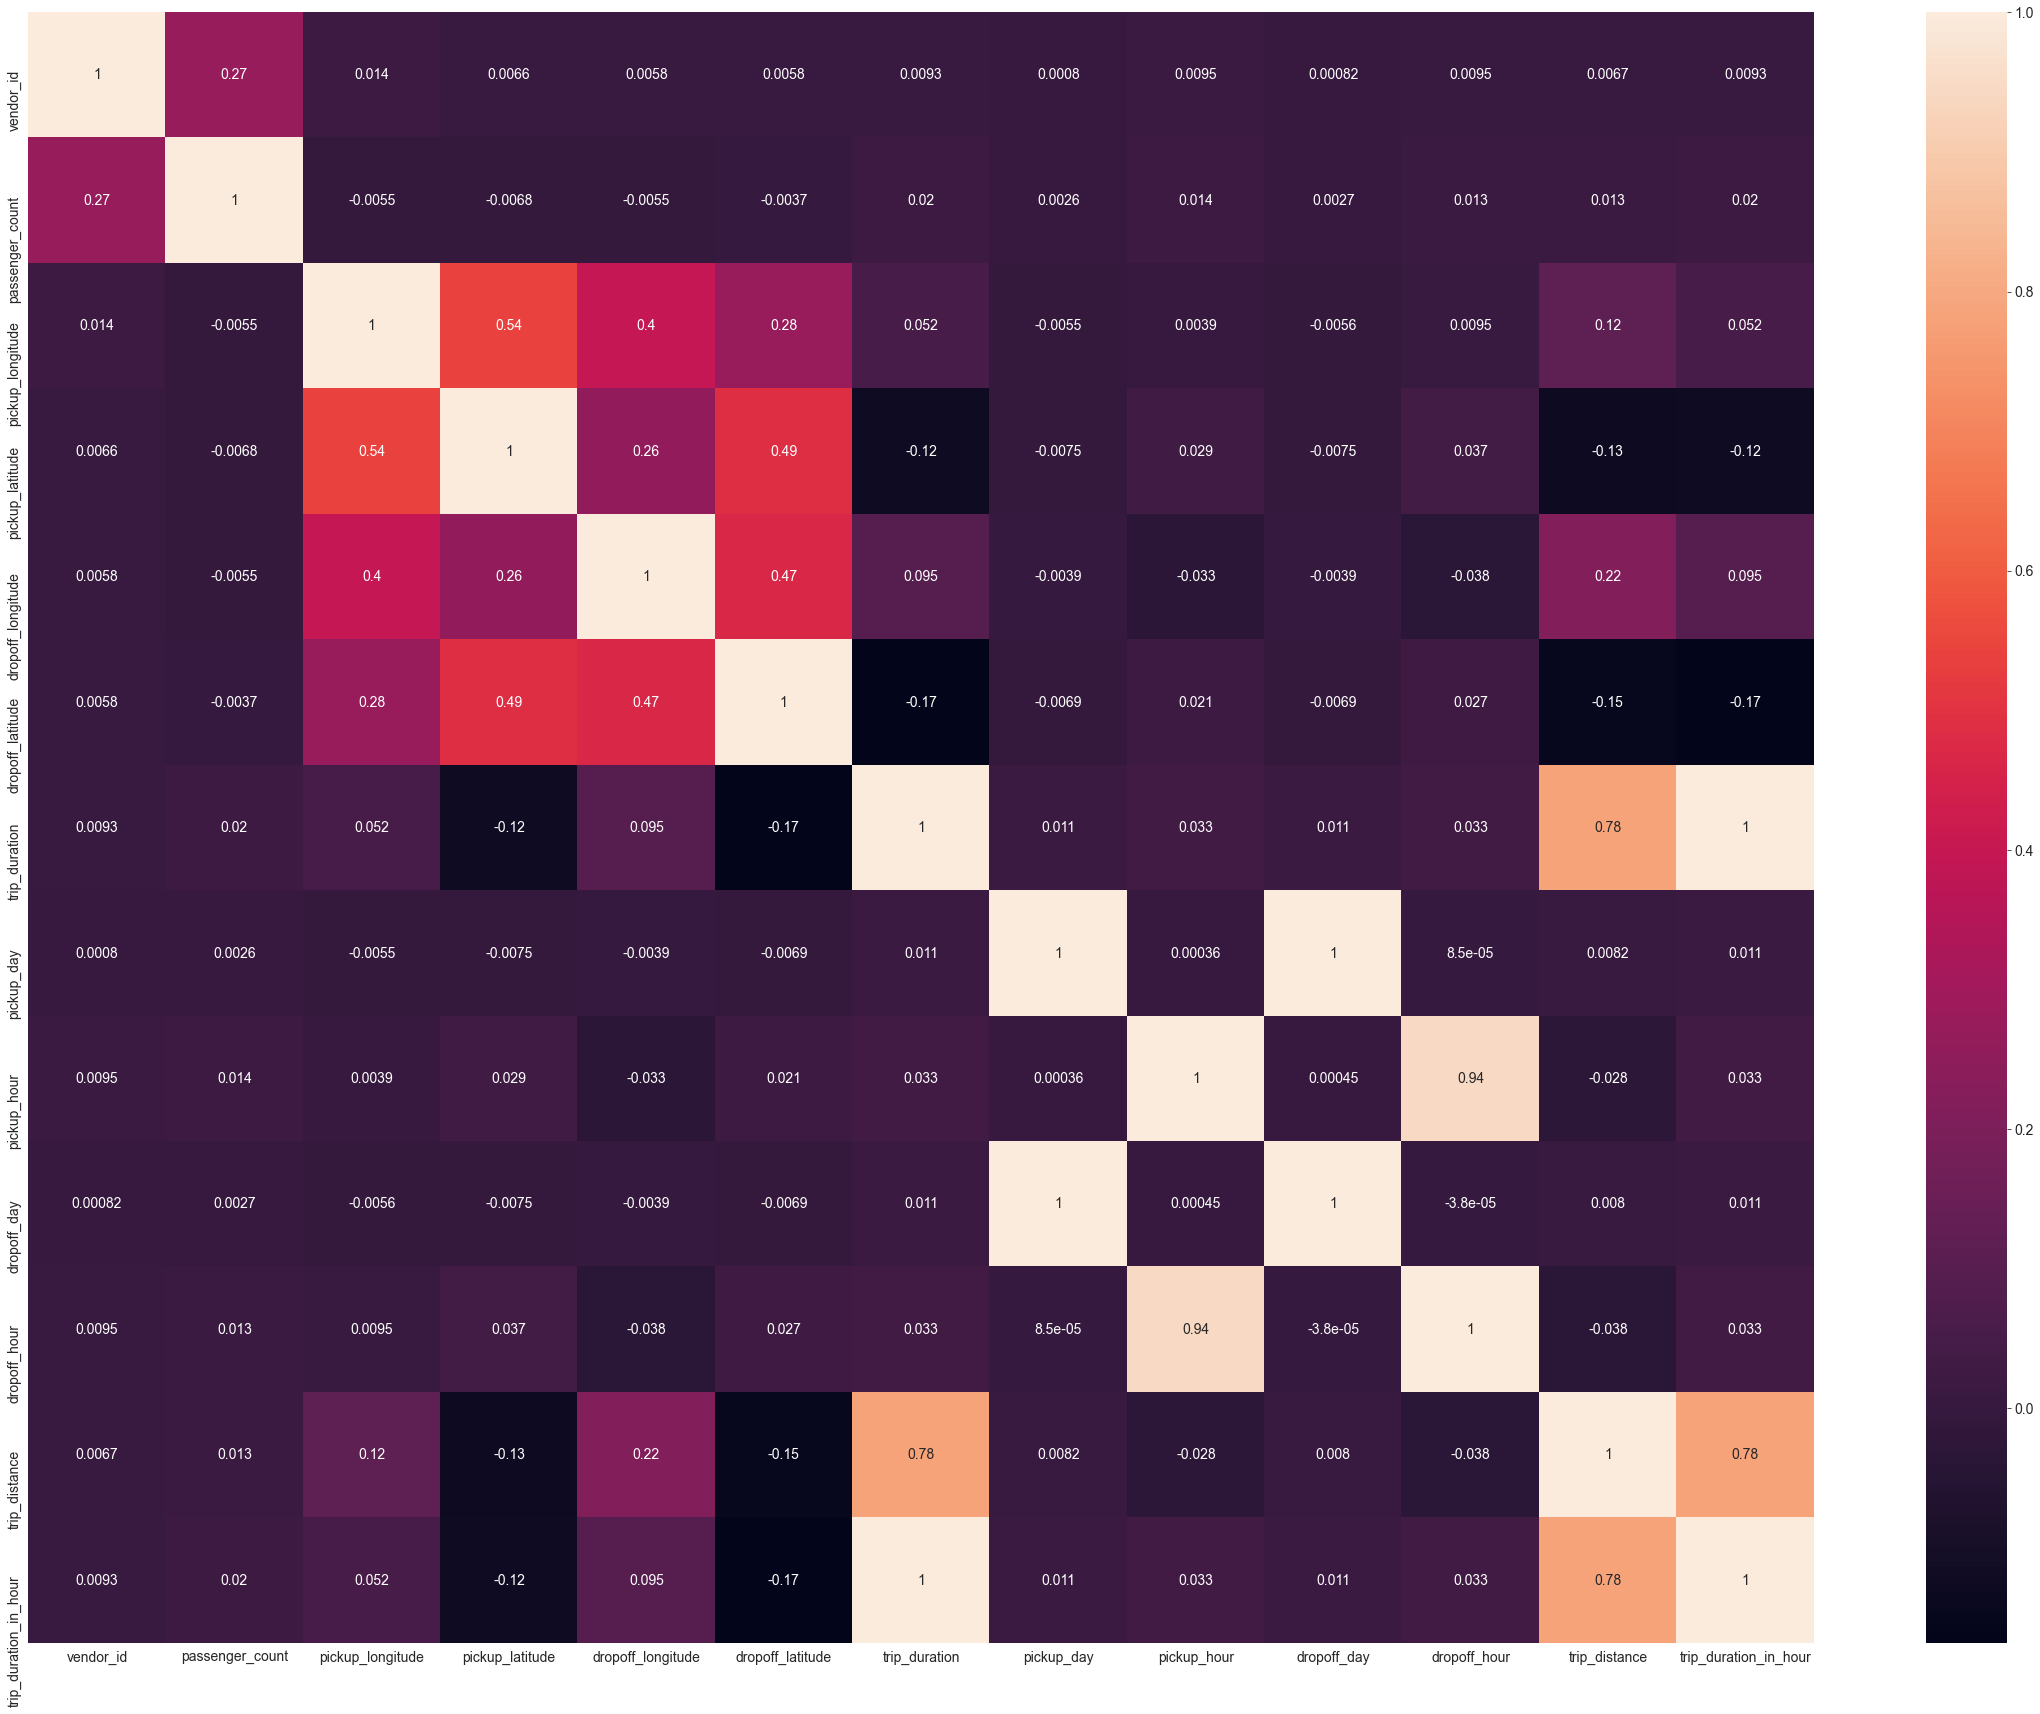

In [26]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

In [27]:
train_df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [28]:
df['passenger_count'].value_counts()

1    1033600
2     210318
4     154830
3      59896
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Pickup Hours Distribution')

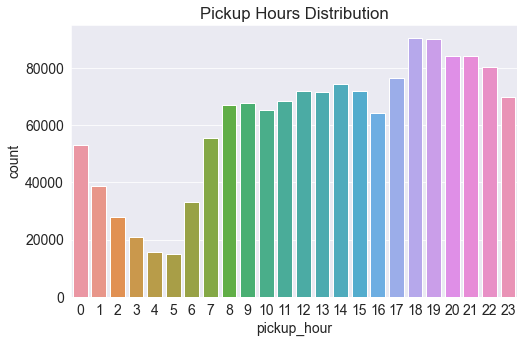

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x=train_df['pickup_hour']).set_title("Pickup Hours Distribution")

Text(0.5, 1.0, 'Pickup day Distribution')

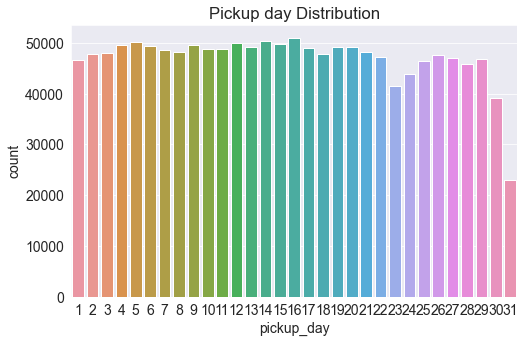

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x=train_df['pickup_day']).set_title("Pickup day Distribution")

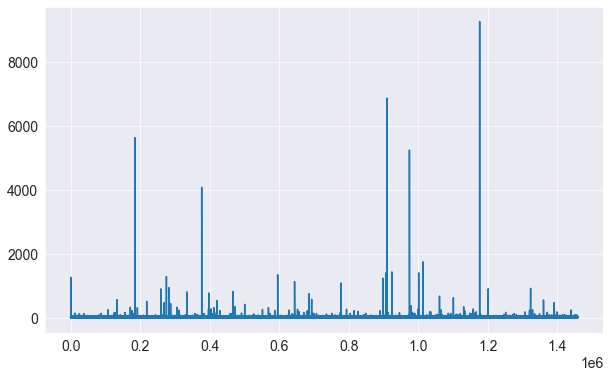

In [31]:
plt.plot(train_df['avg_speed'])

In [32]:
#----------------------

In [33]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_day', 'pickup_hour',
       'pickup_day_of_week', 'dropoff_date', 'dropoff_day', 'dropoff_hour',
       'dropoff_day_of_week', 'trip_distance', 'trip_duration_in_hour',
       'avg_speed', 'pickupday_of_week_number', 'dropoffday_of_week_number'],
      dtype='object')

In [35]:
input_cols=['pickup_day','pickup_hour','trip_distance','pickupday_of_week_number']

In [36]:
target_col='trip_duration'

In [37]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [38]:
test_inputs = test_df[input_cols].copy()

In [39]:
numeric_cols=['trip_distance']
categorical_cols=['pickup_day','pickup_hour','pickupday_of_week_number']
numeric_cols

['trip_distance']

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [42]:
numeric_cols

['trip_distance']

In [43]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [46]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [47]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBRegressor

In [51]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [52]:
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
preds = model.predict(X)

In [54]:
preds

array([ 615.13403,  661.77747, 1569.7057 , ..., 1455.3104 ,  652.7932 ,
        601.9047 ], dtype=float32)

In [55]:
#------- Evaluation----

In [56]:
from sklearn.metrics import mean_squared_error,accuracy_score

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [57]:
rmse(preds, targets)

4344.281101167363

In [58]:
#------ Visulization -------